In [1]:
import matplotlib.pyplot as plt
import numpy as np
from clime import data, model, explainer, plot_utils

22-Dec-09 12:21:16 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
/home/matt/anaconda3/envs/clime/lib/python3.9/site-packages/fatf/vis/__init__.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Data 
Generate dataset and get an unbalanced version as well

In [2]:
c1 = 50
c2 = 100
n_samples = c1 + c2
train_data, test_data = data.get_moons(samples=n_samples)
# train_data, test_data = data.get_gaussian(samples=n_samples)
class_proportions = [c1/n_samples, c2/n_samples]
unbalanced_train_data = data.unbalance(train_data, class_proportions)

Plot the datasets

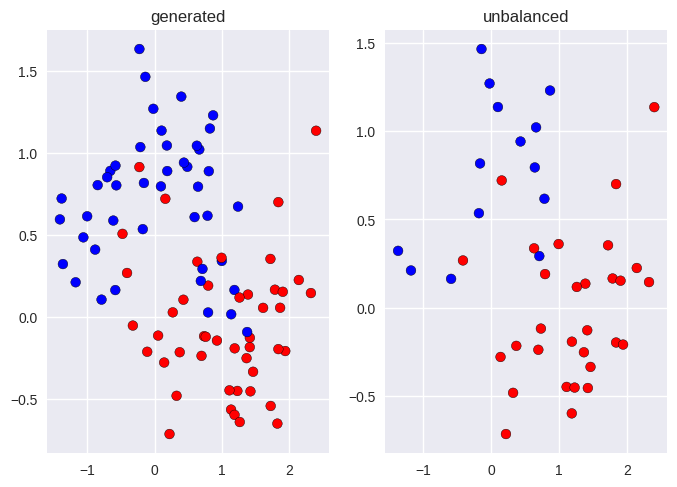

In [3]:
datasets = {'generated': train_data, 'unbalanced': unbalanced_train_data}
fig, axs = plt.subplots(1, len(datasets.keys()))
for i, key in enumerate(datasets.keys()):
    plot_utils.plot_classes(datasets[key], axs[i])
    axs[i].set_title(key)

# Model

In [4]:
clf = model.SVM(train_data)
clf_unbal = model.SVM(unbalanced_train_data)

plot the models' decision boundaries

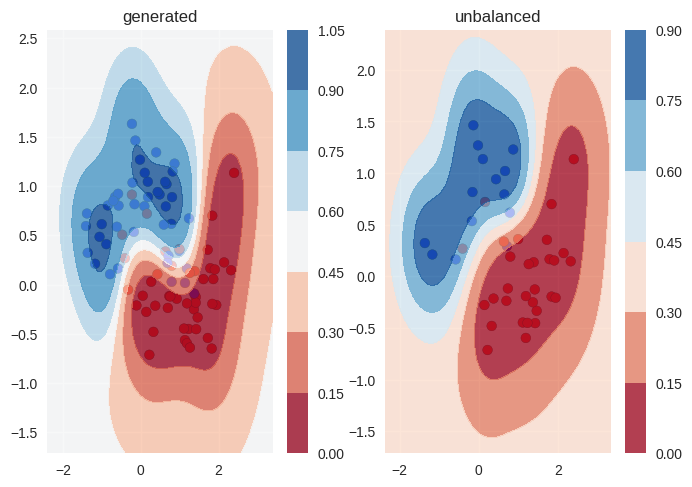

In [5]:
models = {'generated': clf, 'unbalanced': clf_unbal}
fig, axs = plt.subplots(1, len(datasets.keys()))
for i, key in enumerate(datasets.keys()):
    plot_utils.plot_classes(datasets[key], axs[i])
    plot_utils.plot_decision_boundary(models[key], datasets[key], ax=axs[i])
    axs[i].set_title(key)

## Balanced training comparision

In [6]:
models = {'normal': clf_unbal, 
          'weighted training': model.SVM_weighted_training(unbalanced_train_data),
          'boundary adjust': model.SVM_balance_boundary(unbalanced_train_data, weight=1),
          'probability adjust': model.SVM_balance_proba(unbalanced_train_data)}

plot adjusted classifiers

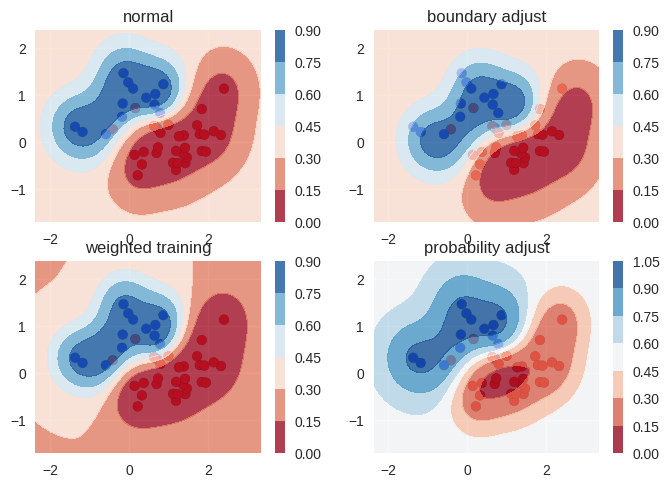

In [7]:
ax_x = 2
ax_y = int(np.ceil(len(models.keys())/2))
fig, axs = plt.subplots(ax_x, ax_y)
count = 0
model_keys = list(models.keys())
for j in range(ax_x):
    for i in range(ax_y):
        data = unbalanced_train_data
        key = model_keys[count]
        plot_utils.plot_classes(data, axs[i][j])
        plot_utils.plot_decision_boundary(models[key], data, ax=axs[i][j])
        axs[i][j].set_title(key)
        count += 1

# Explainer

In [8]:
lime = explainer.LIME(train_data, clf)
lime_explanation = lime(test_data['X'][0, :])

lime_unbal = explainer.LIME(unbalanced_train_data, clf_unbal)
lime_explanation = lime_unbal(test_data['X'][0, :])

22-Dec-09 12:21:17 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 2 features with forward selection.
22-Dec-09 12:21:17 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 2 features with forward selection.


## Balanced Data Explanation

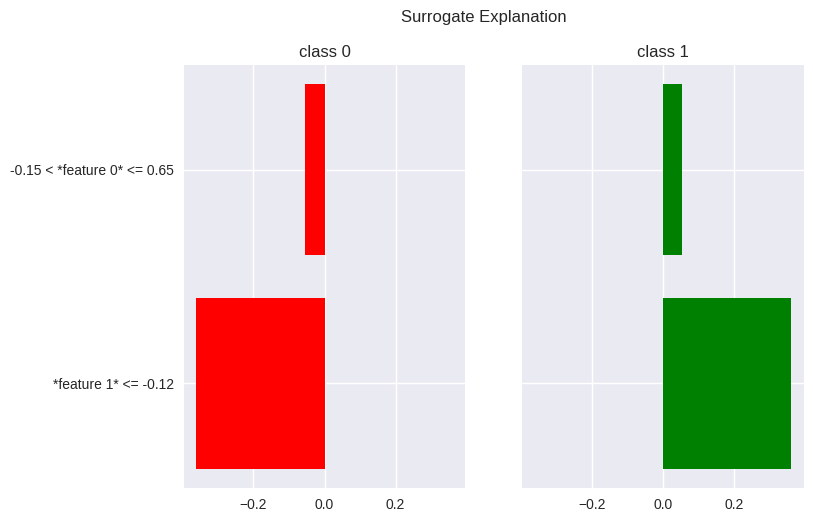

In [9]:
lime.plot_explanation()

## Unbalanced Data Explanation

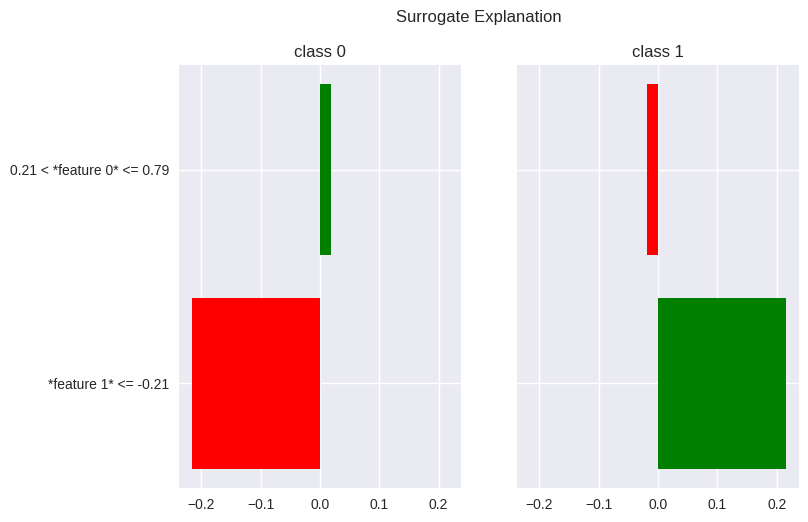

In [10]:
lime_unbal.plot_explanation()